In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('duration eda_bowen.csv')

In [17]:
df1 = df1.rename(columns = {'nct number':'nct_number'})

In [8]:
df2 = pd.read_csv('updated_data (1).csv')

In [23]:
df = df1.merge(df2[['nct_number','measure_PFS', 'measure_MTD', 'measure_Cmax', 'measure_OS',
       'measure_DOR', 'measure_DLT', 'measure_', 'measure_AEs', 'measure_Tmax',
       'measure_ORR', 'number_of_measures', 'drug_included',
       'biological_included', 'other_included', 'procedure_included',
       'intervention_count', 'multiple_interverions',
       'include_country_United States', 'include_country_France',
       'include_country_United Kingdom', 'include_country_Germany',
       'lead_country', 'location_count', 'multiple_locations']], how = 'left')

In [33]:
df.columns = df.columns.str.lower()

In [30]:
df2.groupby('age').agg({'duration':['count', 'mean']}).sort_values(('duration', 'count'), ascending = False).to_csv('age.csv')

In [4]:
##conditions, outcome measures,Funded Bys, study design

## 1. duration bin

<AxesSubplot:>

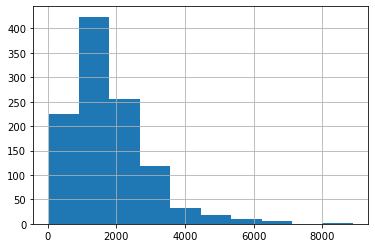

In [35]:
df.duration.hist()

In [49]:
df.duration.mean()

1788.3636363636363

In [46]:
def condition(x):
    if x<730:
        return "D1: 2yr"
    elif x<1825:
        return "D2: 2-5yr"
    else:
        return 'D3: 5yr+'

In [47]:
df['dc'] = df['duration'].apply(lambda x: condition(x))

In [48]:
df.dc.value_counts()

D2: 2-5yr    525
D3: 5yr+     438
D1: 2yr      126
Name: dc, dtype: int64

In [50]:
df.columns

Index(['unnamed: 0', 'rank', 'nct_number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1', 'measure_pfs', 'measure_mtd',
       'measure_cmax', 'measure_os', 'measure_dor', 'measure_dlt', 'measure_',
       'measure_aes', 'measure_tmax', 'measure_orr', 'number_of_measures',
       'drug_included', 'biological_included', 'other_included',
       'procedure_included', 'intervention_count', 'multiple_interverions',
       'include_country_united states', 'include_country_france',
       'include_country_united kingdom', 'include_countr

## 2. modeling

In [ ]:
## 2.0 data prepare - one hot encoding

In [53]:
from sklearn.model_selection import train_test_split

In [62]:
df['y_class'] = df['dc']

In [67]:
df['indus'] = df['ftype2'].apply(lambda x: 1 if x=='Industry Lead' else 0)

In [98]:
df['condition_count'] = df.conditions.str.count('\|') + 1

In [71]:
df['random'] = df['allocation'].apply(lambda x: 1 if x=='Randomized' else 0)

In [73]:
df['cross'] = df['interv_mod2'].apply(lambda x: 1 if x=='Crossover Assignment' else 0)

In [102]:
df['label_open'] = df['mask1'].apply(lambda x: 1 if x=='None (Open Label)' else 0)
df['label_nopen'] = df['mask1'].apply(lambda x: 1 if x=='Not Open Label' else 0)

In [103]:
df.mask1.value_counts()

None (Open Label)    996
Not Open Label        14
Name: mask1, dtype: int64

In [104]:
df['purp_treat'] = df['purp1'].apply(lambda x: 1 if x=='Treatment/Diagnostic' else 0)
df['purp_prev'] = df['purp1'].apply(lambda x: 1 if x=='Other/Basic/Prevention' else 0)

In [79]:
df.purp1.value_counts()

Treatment/Diagnostic      1035
Other/Basic/Prevention      34
Supportive Care             15
Name: purp1, dtype: int64

In [109]:
df['us_lead'] = df['lead_country'].apply(lambda x: 1 if x=='United States' else 0)
df['france_lead'] = df['lead_country'].apply(lambda x: 1 if x=='France' else 0)
df['uk_lead'] = df['lead_country'].apply(lambda x: 1 if x=='United Kingdom' else 0)
df['german_lead'] = df['lead_country'].apply(lambda x: 1 if x=='Germany' else 0)

In [105]:
df.lead_country.value_counts()

United States     829
Others            195
France             28
United Kingdom     21
Germany            16
Name: lead_country, dtype: int64

In [106]:
df.columns

Index(['unnamed: 0', 'rank', 'nct_number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1', 'measure_pfs', 'measure_mtd',
       'measure_cmax', 'measure_os', 'measure_dor', 'measure_dlt', 'measure_',
       'measure_aes', 'measure_tmax', 'measure_orr', 'number_of_measures',
       'drug_included', 'biological_included', 'other_included',
       'procedure_included', 'intervention_count', 'multiple_interverions',
       'include_country_united states', 'include_country_france',
       'include_country_united kingdom', 'include_countr

# what's 'measure_'

In [110]:
X_features = ['indus', 'condition_count', 'random', 'cross', 'label_open', 'label_nopen',
              'purp_treat', 'purp_prev', 'us_lead', 'france_lead', 'uk_lead', 'german_lead',
              'measure_pfs', 'measure_mtd','measure_cmax', 'measure_os', 'measure_dor', 
              'measure_dlt', 'measure_aes', 'measure_tmax', 'measure_orr', 'number_of_measures',
              'drug_included', 'biological_included', 'other_included','procedure_included', 'intervention_count',
              'include_country_united states', 'include_country_france','include_country_united kingdom', 
              'include_country_germany','location_count']

In [111]:
train, test = train_test_split(df[X_features+['y_class']], test_size = 0.2, random_state = 42)

In [122]:
from sklearn.metrics import accuracy_score

## 2.1 logistic reg

In [125]:
from sklearn.linear_model import LogisticRegression

#modeling
LM_model = LogisticRegression(penalty='l2', max_iter=500, multi_class='ovr', solver='liblinear')
LM_model.fit(train[X_features],train['y_class'])

# Prediction
LM_pred_prob = pd.DataFrame(LM_model.predict_proba(test[X_features]))
LM_pred = pd.DataFrame(LM_model.predict(test[X_features]))
LM_pred = pd.concat([test.reset_index()['y_class'],LM_pred_prob,LM_pred],axis=1, ignore_index=True)
print(LM_pred.shape)

LM_pred.columns = ['Actual','y_prob_d1', 'y_prob_d2','y_prob_d3', 'Y_pred']
LM_pred.head()

## performance
accuracy_score(LM_pred.Actual, LM_pred.Y_pred)

(218, 5)


0.6146788990825688

In [128]:
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']) 

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,2,0,0
D2: 2-5yr,18,75,32
D3: 5yr+,5,29,57


In [129]:
pd.crosstab(LM_pred['Y_pred'],LM_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,1.00,0.00,0.00
D2: 2-5yr,0.14,0.60,0.26
D3: 5yr+,0.05,0.32,0.63


## 2.2 decision tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

# Modeling
dt_model = DecisionTreeClassifier(random_state=0).fit(train[X_features],train['y_class'])

# Prediction
def Prediction(model):
    pred_prob = pd.DataFrame(model.predict_proba(test[X_features]))
    pred = pd.DataFrame(model.predict(test[X_features]))
    pred = pd.concat([test.reset_index()['y_class'],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','y_prob_d1', 'y_prob_d2','y_prob_d3', 'Y_pred']
    return(pred)
dt_pred = Prediction(dt_model)  

# Actual vs. Prediction
pd.crosstab(dt_pred['Y_pred'],dt_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,0.23,0.55,0.23
D2: 2-5yr,0.13,0.51,0.36
D3: 5yr+,0.07,0.42,0.51


In [131]:
accuracy_score(dt_pred.Actual, dt_pred.Y_pred)

0.481651376146789

## 2.3 neural network

In [132]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(random_state=1, max_iter=300).fit(train[X_features],train['y_class'])
NN_pred = Prediction(NN_model)    
pd.crosstab(NN_pred['Y_pred'],NN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,0.50,0.38,0.12
D2: 2-5yr,0.10,0.59,0.31
D3: 5yr+,0.06,0.34,0.60


In [133]:
accuracy_score(NN_pred.Actual, NN_pred.Y_pred)

0.5871559633027523

## 2.4 random forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=8, random_state=0).fit(train[X_features],train['y_class'])
rf_pred = Prediction(rf_model) 
pd.crosstab(rf_pred['Y_pred'],rf_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,1.00,0.00,0.00
D2: 2-5yr,0.15,0.58,0.27
D3: 5yr+,0.04,0.34,0.62


In [135]:
accuracy_score(rf_pred.Actual, rf_pred.Y_pred)

0.6009174311926605

## 2.5 naive bayes

In [136]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(train[X_features],train['y_class'])
NB_pred = Prediction(NB_model)    
pd.crosstab(NB_pred['Y_pred'],NB_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,0.30,0.52,0.17
D2: 2-5yr,0.18,0.50,0.32
D3: 5yr+,0.08,0.47,0.45


In [137]:
accuracy_score(NB_pred.Actual, NB_pred.Y_pred)

0.44036697247706424

## 2.6 KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3).fit(train[X_features],train['y_class'])
KNN_pred = Prediction(KNN_model)    
pd.crosstab(KNN_pred['Y_pred'],KNN_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,0.22,0.49,0.30
D2: 2-5yr,0.11,0.52,0.37
D3: 5yr+,0.06,0.40,0.54


In [139]:
accuracy_score(KNN_pred.Actual, KNN_pred.Y_pred)

0.4724770642201835

## 2.7 LDA

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
disc_model = LinearDiscriminantAnalysis().fit(train[X_features],train['y_class'])
disc_pred = Prediction(disc_model)    
pd.crosstab(disc_pred['Y_pred'],disc_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Actual,D1: 2yr,D2: 2-5yr,D3: 5yr+
Y_pred,,,
D1: 2yr,0.30,0.70,0.00
D2: 2-5yr,0.15,0.55,0.30
D3: 5yr+,0.05,0.34,0.61


In [143]:
accuracy_score(disc_pred.Actual, disc_pred.Y_pred)

0.5642201834862385